# MNIST Classification test using a 3-dimensional sphere codes

In [1]:
import requests
import math
import numpy
from helpers.basis_helper import parse_sphere, normalize
from helpers.tf_qsoftmax import qsoftmax

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Construct a quasiorthogonal basis.
This sphere code "basis" has 12 vectors in 3 dimensions, minimum mutual angle for non-antipodal vectors is about 63$^\circ$. We only take 10.

In [3]:
r = requests.get("http://neilsloane.com/packings/dim3/pack.3.12.txt")
sp_3_12 = parse_sphere(r.text)
sp_3 = numpy.array(sp_3_12[0:10], dtype=numpy.float32)
basis3 = normalize(sp_3)

### Let's build and train our model
This is the same architecture except we have an output of 3 dimensions and apply the qsoftmax function as the activation function

In [4]:
sp3_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Lambda(qsoftmax(basis3))
])

In [5]:
sp3_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [8]:
sp3_model.fit(x_train,
              y_train,
              epochs=20,
              validation_data=(x_test, y_test),
              verbose=0)

## We display some results
### The validation loss tells us how well the training went

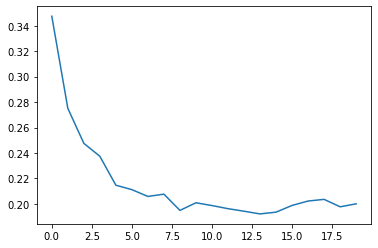

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(sp3_model.history.history['val_loss'])

### Print the final results in big bold text

In [10]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    sp3_model.history.history['val_accuracy'][-1],
    sp3_model.history.history['accuracy'][-1])
display(Markdown(f"# {text}"))

# The accuracy is 0.957% for the test set and 0.957% for the training set

In [9]:
text

'The accuracy is 0.957% for the test set and 0.956% for the training set'